# Redes neuronales

## Introduccion

Una red neuronal es un algoritmo de machine learning que se inspira en las conexiones neuronales del cerebro humano. Está compuesta por capas de nodos, llamados neuronas, que se organizan en tres tipos de capas: una capa de entrada, una o más capas ocultas y una capa de salida.

Cada neurona recibe valores de entrada, los transforma aplicando una operación matemática (una combinación lineal seguida de una función no lineal), y luego pasa ese resultado a las siguientes neuronas. A medida que los datos atraviesan las capas, la red aprende a identificar patrones y relaciones complejas entre las variables.


![DT](./figs/multicapa.png)

Esto la convierte en una herramienta muy poderosa para tareas donde los límites entre clases no son tan evidentes o lineales.

## Como funcionan?

El aprendizaje en una red neuronal ocurre mediante un proceso iterativo.

Todo empieza con los pesos $W_{i, j}$ asignados de forma aleatoria. Con estos pesos, se hace una propagación hacia adelante (forward pass), donde los datos de entrada se procesan capa por capa hasta obtener una predicción, que llamamos y_pred.

Luego, se calcula la diferencia entre ***y_pred*** y el valor real (***y_true***) usando una función  que llamamos ***funcion de pérdida*** (loss function), que nos dice qué tan mal lo está haciendo la red. Nuestro objetivo es que esa pérdida sea lo más pequeña posible. En esencia, esto se convierte en un problema de minimización de una función con respecto a los pesos $W_{i, j}$.

Y cómo se minimiza una función?
Con derivadas!

Esto es exactamente lo que ocurre: se calculan derivadas de la función de pérdida con respecto a cada peso, aplicando la regla de la cadena para pasar por todas las capas. Este proceso se llama ***backpropagation***, y es lo que permite propagar el error hacia atrás por la red. Se denomina backpropagation porque la regla de la cadena se aplica desde la ultima capa hacia atras.

Con esos gradientes, se usa el algoritmo de descenso del gradiente, que ajusta los pesos en la dirección en la que el error disminuye más rápido.

![](./figs/gradient_descent.png)


La velocidad a la que se alcanza el minimo esta determinada por el *learning rate*. El caso mas simple es el siguiente:


<img src="./figs/gradient_descent_2.png" alt="Árbol de decisión" width="600"/>


Este proceso —propagar hacia adelante, calcular el error, retropropagar, ajustar pesos— se conoce como ***epoca*** y se repite hasta que la funcion de perdida no cambia.


In [ ]:
!pip install torch
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.3/216.1 MB 7.7 MB/s eta 0:00:29
   ---------------------------------------- 1.0/216.1 MB 12.2 MB/s eta 0:00:18
   ---------------------------------------- 1.8/216.1 MB 14.5 MB/s eta 0:00:15
    --------------------------------------- 3.5/216.1 MB 17.4 MB/s eta 0:00:13
    --------------------------------------- 4.4/216.1 MB 17.6 MB/s eta 0:00:13
   - -------------------------------------- 5.8/216.1 MB 18.6 MB/s eta 0:00:12
   - -------------------------------------- 6.9/216.1 MB 18.5 MB/s eta 0:00:12
   - -------------------------------------- 8.5/216.1 MB 20.2 MB/s eta 0:00:11
   - -------------------------------------- 9.6/216.1 MB 20.4 MB/s eta 0:00:11
   -- ------------------------------------- 11.2/216.1 MB 22.5 MB/s eta 0:00:10
   -- ------------------------------------- 12.4/216.1 MB 22.6 MB/s eta 0:00:10
   -- ------------------------------------- 13.5/216.1 MB 2

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

X = mnist.data.numpy().reshape(-1, 28*28) / 255.0 
y = mnist.targets.numpy()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
model = NN()
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:

n_epochs = 100
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Evaluation mode
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Prediction time
model.eval()
with torch.no_grad():
    y_pred_test = torch.argmax(model(X_test_tensor), dim=1)
    y_pred_train = torch.argmax(model(X_train_tensor), dim=1)


Epoch 1/100, Train Loss: 2.3041, Test Loss: 2.2640
Epoch 2/100, Train Loss: 2.2634, Test Loss: 2.1859
Epoch 3/100, Train Loss: 2.1843, Test Loss: 2.0975
Epoch 4/100, Train Loss: 2.0945, Test Loss: 2.0086
Epoch 5/100, Train Loss: 2.0050, Test Loss: 1.9252
Epoch 6/100, Train Loss: 1.9220, Test Loss: 1.8511
Epoch 7/100, Train Loss: 1.8483, Test Loss: 1.7969
Epoch 8/100, Train Loss: 1.7938, Test Loss: 1.7523
Epoch 9/100, Train Loss: 1.7493, Test Loss: 1.7134
Epoch 10/100, Train Loss: 1.7112, Test Loss: 1.6866
Epoch 11/100, Train Loss: 1.6846, Test Loss: 1.6673
Epoch 12/100, Train Loss: 1.6650, Test Loss: 1.6507
Epoch 13/100, Train Loss: 1.6482, Test Loss: 1.6388
Epoch 14/100, Train Loss: 1.6365, Test Loss: 1.6298
Epoch 15/100, Train Loss: 1.6274, Test Loss: 1.6208
Epoch 16/100, Train Loss: 1.6182, Test Loss: 1.6125
Epoch 17/100, Train Loss: 1.6101, Test Loss: 1.6049
Epoch 18/100, Train Loss: 1.6024, Test Loss: 1.5989
Epoch 19/100, Train Loss: 1.5961, Test Loss: 1.5943
Epoch 20/100, Train L

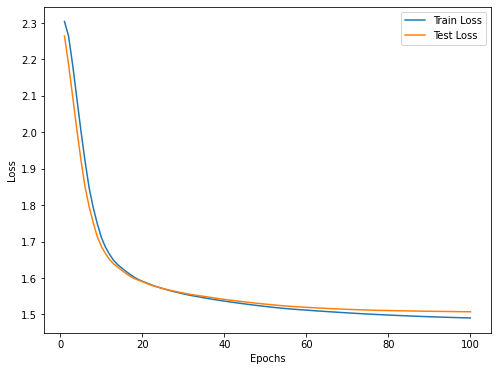

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, n_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
accuracy_test = accuracy_score(y_test_tensor, y_pred_test)
accuracy_train = accuracy_score(y_train_tensor, y_pred_train)
print(f"Exactitud train set: {accuracy_train:.2f}")
print(f"Exactitud test set: {accuracy_test:.2f}")

Exactitud train set: 0.96
Exactitud test set: 0.95
